# Install deps

In [1]:
%cd /home/locke/ManifoldRG/MultiNet/src/eval/profiling/openvla
%pip install -q -e .


/home/locke/ManifoldRG/MultiNet/src/eval/profiling/openvla
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensordict 0.4.0 requires torch>=2.3.0, but you have torch 2.2.0 which is incompatible.
torchrl 0.4.0 requires torch>=2.3.0, but you have torch 2.2.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install --upgrade transformers
%pip install -U bitsandbytes flash-attn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Load & check dataset structure

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Define the file paths
train_files = tf.io.gfile.glob("/home/locke/ManifoldRG/MultiNet/src/eval/profiling/openvla/data/usc_cloth_sim_converted_externally_to_rlds/0.1.0/usc_cloth_sim_converted_externally_to_rlds-train.tfrecord-*")
val_files = tf.io.gfile.glob("/home/locke/ManifoldRG/MultiNet/src/eval/profiling/openvla/data/usc_cloth_sim_converted_externally_to_rlds/0.1.0/usc_cloth_sim_converted_externally_to_rlds-val.tfrecord-*")

def print_structure(feature, indent=''):
    if isinstance(feature, tf.train.Feature):
        if feature.HasField('bytes_list'):
            print(f"{indent}bytes_list: {len(feature.bytes_list.value)} elements")
        elif feature.HasField('float_list'):
            print(f"{indent}float_list: {len(feature.float_list.value)} elements")
        elif feature.HasField('int64_list'):
            print(f"{indent}int64_list: {len(feature.int64_list.value)} elements")
    elif isinstance(feature, tf.train.Features):
        print(f"{indent}Features:")
        for key, value in feature.feature.items():
            print(f"{indent}  {key}:")
            print_structure(value, indent + '    ')
    elif isinstance(feature, tf.train.Example):
        print("Example:")
        print_structure(feature.features)

raw_dataset = tf.data.TFRecordDataset(train_files)

for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print_structure(example)

2024-10-01 20:39:25.155431: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-01 20:39:25.180196: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-01 20:39:25.180217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-01 20:39:25.180875: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-01 20:39:25.185381: I tensorflow/core/platform/cpu_feature_guar

Example:
Features:
  steps/observation/image:
    bytes_list: 100 elements
  steps/is_last:
    int64_list: 100 elements
  steps/language_instruction:
    bytes_list: 100 elements
  steps/language_embedding:
    float_list: 51200 elements
  steps/is_terminal:
    int64_list: 100 elements
  episode_metadata/file_path:
    bytes_list: 1 elements
  steps/is_first:
    int64_list: 100 elements
  steps/discount:
    float_list: 100 elements
  steps/reward:
    float_list: 100 elements
  steps/action:
    float_list: 400 elements


2024-10-01 20:39:26.740649: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-01 20:39:26.821455: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-01 20:39:26.821594: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

### Load dataset

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
from typing import List


train_files = tf.io.gfile.glob("/home/locke/ManifoldRG/MultiNet/src/eval/profiling/openvla/data/usc_cloth_sim_converted_externally_to_rlds/0.1.0/usc_cloth_sim_converted_externally_to_rlds-train.tfrecord-*")
val_files = tf.io.gfile.glob("/home/locke/ManifoldRG/MultiNet/src/eval/profiling/openvla/data/usc_cloth_sim_converted_externally_to_rlds/0.1.0/usc_cloth_sim_converted_externally_to_rlds-val.tfrecord-*")


def parse_tfrecord_fn(example_proto):
    feature_description = {
        'steps/language_instruction': tf.io.FixedLenFeature([100], tf.string),
        'steps/observation/image': tf.io.FixedLenFeature([100], tf.string),
        'steps/action': tf.io.FixedLenFeature([400], tf.float32),
    }
    parsed_features = tf.io.parse_single_example(example_proto, feature_description)
    return parsed_features

def process_example(parsed_features):
    return parsed_features

def load_dataset(files: List[str]):
    raw_dataset = tf.data.TFRecordDataset(files)
    parsed_dataset = raw_dataset.map(parse_tfrecord_fn)
    return parsed_dataset.map(process_example)



2024-10-02 18:08:10.069077: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-02 18:08:10.229779: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 18:08:10.229846: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 18:08:10.251775: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 18:08:10.313210: I tensorflow/core/platform/cpu_feature_guar

In [3]:
dataset = load_dataset(train_files)

for i, example in enumerate(dataset):
    print(f"Example {i}:")
    print(f"Instruction shape: {example['steps/language_instruction'].shape}")
    print(f"Image shape: {example['steps/observation/image'].shape}")
    print(f"Action shape: {example['steps/action'].shape}")

    first_instruction = example['steps/language_instruction'][0].numpy().decode('utf-8')
    print(f"First instruction: {first_instruction}")

    print(f"First action: {example['steps/action'][:4].numpy()}")  # Printing only first 4 elements

    print("\n")

    if i >= 4:
        break

Example 0:
Instruction shape: (100,)
Image shape: (100,)
Action shape: (400,)
First instruction: fold cloth along diagonal
First action: [0.000 0.500 1.000 0.000]


Example 1:
Instruction shape: (100,)
Image shape: (100,)
Action shape: (400,)
First instruction: fold cloth along diagonal
First action: [0.000 0.500 1.000 0.000]


Example 2:
Instruction shape: (100,)
Image shape: (100,)
Action shape: (400,)
First instruction: fold cloth along diagonal
First action: [0.000 0.500 1.000 0.000]


Example 3:
Instruction shape: (100,)
Image shape: (100,)
Action shape: (400,)
First instruction: fold cloth along diagonal
First action: [0.000 0.500 1.000 0.000]


Example 4:
Instruction shape: (100,)
Image shape: (100,)
Action shape: (400,)
First instruction: fold cloth along diagonal
First action: [0.000 0.500 1.000 0.000]




# OpenVLA Eval on USC Cloth Sim

In [2]:
import os
import sys
import tensorflow as tf
from dataclasses import dataclass
from pathlib import Path
from typing import Optional, Union, Tuple, List
import torch
import bitsandbytes

import numpy as np
import tqdm

sys.path.append("/content/drive/MyDrive/ManifoldRG/MultiNet/src/eval/profiling/openvla")
from experiments.robot.robot_utils import (get_model,
                                           get_image_resize_size,
                                           set_seed_everywhere,
                                           get_action)
from experiments.robot.openvla_utils import get_processor


@dataclass
class EvalConfig:
    model_family: str = "openvla"
    pretrained_checkpoint: Union[str, Path] = "openvla/openvla-7b"
    load_in_8bit: bool = False
    load_in_4bit: bool = True
    center_crop: bool = True
    seed: int = 7
    unnorm_key = "bridge_orig"


def to_discrete(action):
    return np.where(action >= 0.5, 1, 0)

def eval_usc_cloth_sim(cfg: EvalConfig) -> Tuple[List[float], int, float, float]:
    set_seed_everywhere(cfg.seed)

    model = get_model(cfg)
    processor = get_processor(cfg)

    resize_size = get_image_resize_size(cfg)

    dataset = load_dataset(train_files)

    avg_mse_list = []
    total_dataset_amse = 0.0
    episode_count = 0
    obs = {}

    for i, batch in enumerate(dataset):
        print(f"Example {i}:")
        print(f"Instruction type: {type(batch['steps/language_instruction'])}")
        print(f"Instruction shape: {batch['steps/language_instruction'].shape if hasattr(batch['steps/language_instruction'], 'shape') else 'No shape (scalar)'}")
        print(f"Image type: {type(batch['steps/observation/image'])}")
        print(f"Image shape: {batch['steps/observation/image'].shape if hasattr(batch['steps/observation/image'], 'shape') else 'No shape (scalar)'}")
        print(f"Action type: {type(batch['steps/action'])}")
        print(f"Action shape: {batch['steps/action'].shape if hasattr(batch['steps/action'], 'shape') else 'No shape (scalar)'}")

        first_instruction = batch['steps/language_instruction'][0].numpy().decode('utf-8')
        print(f"First instruction: {first_instruction}")
        print(f"First action: {batch['steps/action'][:4].numpy()}")
        print("\n")


        episode_mse = []

        num_steps = batch['steps/language_instruction'].shape[0] if isinstance(batch['steps/language_instruction'], tf.Tensor) and len(batch['steps/language_instruction'].shape) > 0 else 1

        for idx in range(num_steps):
            image_raw = batch['steps/observation/image'][idx].numpy()
            image = tf.image.decode_jpeg(image_raw, channels=3)
            image = tf.image.resize(image, size=[resize_size, resize_size])
            image = image.numpy().astype(np.uint8)
            obs['full_image'] = image

            instruction = batch['steps/language_instruction'][idx].numpy().decode('utf-8')
            predicted_action = get_action(cfg, model, obs, instruction, processor=processor)

            actual_action = batch['steps/action'][4*idx : 4*idx+4]

            predicted_action_4d = np.array([predicted_action[0], predicted_action[1], predicted_action[2], to_discrete(predicted_action[6])])

            if len(actual_action) == 0:
                print(f"Warning: actual_action is empty for step {idx}")
                episode_mse.append(np.nan)
            else:
                actual_action_4d = np.pad(actual_action[:4], (0, max(0, 4 - len(actual_action))))
                actual_action_4d[3] = to_discrete(actual_action_4d[3])
                mse = np.mean((predicted_action_4d - actual_action_4d) ** 2)
                episode_mse.append(mse)

            mse = np.mean((np.array(predicted_action_4d) - np.array(actual_action)) ** 2)
            episode_mse.append(mse)


        avg_episode_mse = np.nanmean(episode_mse)
        avg_mse_list.append(avg_episode_mse)
        total_dataset_amse += avg_episode_mse
        episode_count += 1

        print(f"Episode {episode_count} - Average MSE: {avg_episode_mse:.4f}")

    print(f"\nTotal Average MSE across {episode_count} episodes: {total_dataset_amse / episode_count:.4f}")

    avg_dataset_amse = total_dataset_amse / episode_count

    min_amse = min(avg_mse_list)
    max_amse = max(avg_mse_list)
    normalized_amse = (avg_dataset_amse - min_amse) / (max_amse - min_amse) if max_amse != min_amse else 0

    print(f"Normalized Average AMSE for dataset: {normalized_amse:.4f}")

    return avg_mse_list, episode_count, total_dataset_amse, normalized_amse


cfg = EvalConfig()
avg_mse_list, episode_count, total_dataset_amse, normalized_amse = eval_usc_cloth_sim(cfg)


2024-10-02 18:08:20.498116: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-02 18:08:20.500621: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-02 18:08:20.500718: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

[*] Instantiating Pretrained VLA model
[*] Loading in BF16 with Flash-Attention Enabled


10/02 [18:08:28] WARNING  | >> Expected `transformers==4.40.1` and `tokenizers==0.19.1`   ]8;id=75954;file:///home/locke/.cache/huggingface/modules/transformers_modules/openvla/openvla-7b/31f090d05236101ebfc381b61c674dd4746d4ce0/modeling_prismatic.py\modeling_prismatic.py]8;;\:]8;id=861168;file:///home/locke/.cache/huggingface/modules/transformers_modules/openvla/openvla-7b/31f090d05236101ebfc381b61c674dd4746d4ce0/modeling_prismatic.py#228\228]8;;\
                          but got `transformers==4.45.1` and `tokenizers==0.20.0`; there                           
                          might be inference-time regressions due to dependency changes.                           
                          If in doubt, pleaseuse the above versions.                                               

Loading checkpoint shards: 100%|██████████| 3/3 [00:07<00:00,  2.64s/it]


You can ignore this if you are loading the base VLA (i.e. not fine-tuned) checkpoint.Otherwise, you may run into errors when trying to call `predict_action()` due to an absent `unnorm_key`.
Loaded model: <class 'transformers_modules.openvla.openvla-7b.31f090d05236101ebfc381b61c674dd4746d4ce0.modeling_prismatic.OpenVLAForActionPrediction'>
Example 0:
Instruction type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Instruction shape: (100,)
Image type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Image shape: (100,)
Action type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Action shape: (400,)
First instruction: fold cloth along diagonal
First action: [0.000 0.500 1.000 0.000]




Starting from v4.46, the `logits` model output will have the same type as the model (except at train time, where it will always be FP32)
We detected that you are passing `past_key_values` as a tuple of tuples. This is deprecated and will be removed in v4.47. Please convert your cache or use an appropriate `Cache` class (https://huggingface.co/docs/transformers/kv_cache#legacy-cache-format)


Episode 1 - Average MSE: 0.1222
Example 1:
Instruction type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Instruction shape: (100,)
Image type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Image shape: (100,)
Action type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Action shape: (400,)
First instruction: fold cloth along diagonal
First action: [0.000 0.500 1.000 0.000]


Episode 2 - Average MSE: 0.1190
Example 2:
Instruction type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Instruction shape: (100,)
Image type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Image shape: (100,)
Action type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Action shape: (400,)
First instruction: fold cloth along diagonal
First action: [0.000 0.500 1.000 0.000]


Episode 3 - Average MSE: 0.1756
Example 3:
Instruction type: <class 'tensorflow.python.framework.ops.EagerTensor'>
Instruction shape: (100,)
Image type: <class 'tensorflow.python.framework.ops.Eag

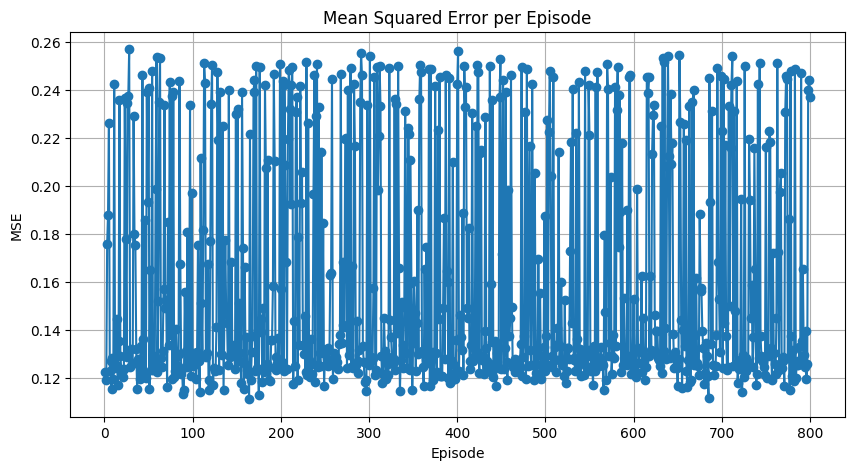

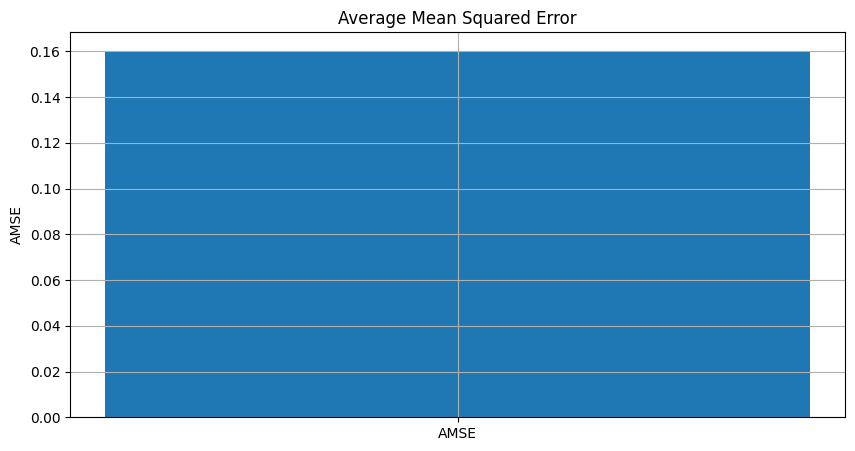

In [5]:
import matplotlib.pyplot as plt


def plot_mse_amse(avg_mse_list, total_dataset_amse, episode_count):
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(avg_mse_list) + 1), avg_mse_list, marker='o')
    plt.title('Mean Squared Error per Episode')
    plt.xlabel('Episode')
    plt.ylabel('MSE')
    plt.grid(True)
    plt.show()

    amse = total_dataset_amse / episode_count
    plt.figure(figsize=(10, 5))
    plt.bar(['AMSE'], [amse])
    plt.title('Average Mean Squared Error')
    plt.ylabel('AMSE')
    plt.grid(True)
    plt.show()


plot_mse_amse(avg_mse_list, total_dataset_amse, episode_count)

In [6]:
import json


results = {
    "avg_mse_list": avg_mse_list,
    "episode_count": episode_count,
    "total_dataset_amse": total_dataset_amse,
    "normalized_amse": normalized_amse
}

save_path = "/home/locke/ManifoldRG/MultiNet/src/eval/profiling/openvla/results/eval_results.json"


with open(save_path, "w") as f:
    json.dump(results, f)

print(f"Results saved to {save_path}")

Results saved to /home/locke/ManifoldRG/MultiNet/src/eval/profiling/openvla/results/eval_results.json
